# USING POLYNOMIAL AND LOGISTIC REGRESSION TO PREDICT FIFA MATCH RESULTS

## Defining the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## Defining the Metric of Success

The project will be considered a success if it can produce a model that can accurately and consistently(without overfitting and underfitting on training data) predict results of FIFA matches.

## Data Relevance

The dataset can be found [here](https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc)

A glossary of the dataset is as follows:

* Rank
* Country Abbreviation
* Total Points
* Previous Points
* Rank Change
* Average Previous Years Points
* Average Previous Years Points Weighted (50%)
* Average 2 Years Ago Points
* Average 2 Years Ago Points Weighted (30%)
* Average 3 Years Ago Points
* Average 3 Years Ago Points Weighted (20%)
* Confederation
* Date - date of the match
* Home_team - the name of the home team
* Away_team - the name of the away team
* Home_score - full-time home team score including extra time, not including penalty-shootouts
* Away_score - full-time away team score including extra time, not including penalty-shootouts
* Tournament - the name of the tournament
* City - the name of the city/town/administrative unit where the match was played
* Country - the name of the country where the match was played
* Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

## Recording the Experimental Design

* Loading the dataset
* Cleaning the dataset
* Performing Exploratory Data Analysis
* Building a Polynomial Regression Model
* Building a Logistic Regression Model
* Recommendations

## Loading the Libraries

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from yellowbrick.model_selection import validation_curve

## Loading the Data

In [292]:
results = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Week 6 IP Datasets\\results.csv")
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [293]:
ranks = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Week 6 IP Datasets\\fifa_ranking.csv")
ranks.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


## Data Cleaning

### Merging the Two Datasets

In [294]:
# before merge, drop unnecessary columns

results.drop(['city', 'country', 'neutral'], axis=1, inplace=True)

ranks = ranks[['rank', 'country_full', 'rank_date']]

In [295]:
ranks.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [296]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [297]:
# home team
home = pd.merge(results, ranks, how='inner',
               left_on=['date', 'home_team'],
               right_on=['rank_date', 'country_full'])

# away teams

away = pd.merge(results, ranks, how='inner',
               left_on=['date', 'away_team'],
               right_on=['rank_date', 'country_full'])



# merged document

df = pd.merge(home, away, how='inner',
             left_on= ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'],
             right_on = ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'])

In [298]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,rank_x,country_full_x,rank_date_x,rank_y,country_full_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,Bolivia,1993-08-08,22,Uruguay,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,Brazil,1993-08-08,14,Mexico,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,Ecuador,1993-08-08,94,Venezuela,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,Guinea,1993-08-08,86,Sierra Leone,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,Paraguay,1993-08-08,5,Argentina,1993-08-08


### Dropping unnecessary columns

In [299]:
df.drop(['date','country_full_x', 'country_full_y', 'rank_date_x', 'rank_date_y'], axis=1, inplace=True)

### Consistency

In [300]:
df.duplicated().sum()

0

### Completeness

In [301]:
df.isnull().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
rank_x        0
rank_y        0
dtype: int64

### Dataset information

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   871 non-null    object
 1   away_team   871 non-null    object
 2   home_score  871 non-null    int64 
 3   away_score  871 non-null    int64 
 4   tournament  871 non-null    object
 5   rank_x      871 non-null    int64 
 6   rank_y      871 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 54.4+ KB


In [303]:
df.shape

(871, 7)

### Column Accuracy

In [304]:
# renaming some columns

df.rename(columns={'rank_x' : 'home_rank',
                  'rank_y' : 'away_rank'}, inplace=True)

df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'home_rank', 'away_rank'],
      dtype='object')

In [305]:
# creating a match status column from the perspective of the

df['status'] = df['home_score'] - df['away_score']

for pos, val in enumerate(df['status']):
    if  val < 0:
        df.iloc[pos, 7] = 'L'

    elif val > 0:
        df.iloc[pos, 7] = 'W'

    elif val == 0:
        df.iloc[pos, 7] = 'D'

In [306]:
df.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,status
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,W
1,Brazil,Mexico,1,1,Friendly,8,14,D
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,W
3,Guinea,Sierra Leone,1,0,Friendly,65,86,W
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5,L


In [307]:
# tournament column should only have three levels:
#  World Cup, 'Friendly' and Other

df['tournament'].unique()

array(['FIFA World Cup qualification', 'Friendly', 'Merdeka Tournament',
       'South Pacific Games', 'African Cup of Nations',
       'CFU Caribbean Cup qualification', 'Copa América',
       'UEFA Euro qualification',
       'United Arab Emirates Friendship Tournament', 'UNCAF Cup',
       'Korea Cup', 'Gold Cup', 'AFC Asian Cup qualification', 'USA Cup',
       'Millennium Cup', "King's Cup", 'CFU Caribbean Cup', 'Gulf Cup',
       'Cyprus International Tournament',
       'Malta International Tournament', 'UAFA Cup', 'AFF Championship',
       'SAFF Cup', 'Gold Cup qualification', "Prime Minister's Cup",
       'Confederations Cup', 'AFC Asian Cup', 'Nehru Cup', 'COSAFA Cup',
       'CECAFA Cup', 'EAFF Championship',
       'AFC Challenge Cup qualification',
       'African Cup of Nations qualification', 'Copa del Pacífico',
       'Oceania Nations Cup', 'African Nations Championship',
       'Windward Islands Tournament', 'Intercontinental Cup'],
      dtype=object)

In [308]:
for pos, val in enumerate(df['tournament']):
    if val == 'FIFA World Cup qualification':
        df.iloc[pos, 4] = 'World Cup'
    
    elif val == 'Friendly':
        df.iloc[pos, 4] = 'Friendly'
    
    else:
        df.iloc[pos, 4] = 'Other'

In [309]:
df['tournament'].value_counts()

Friendly     574
Other        163
World Cup    134
Name: tournament, dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

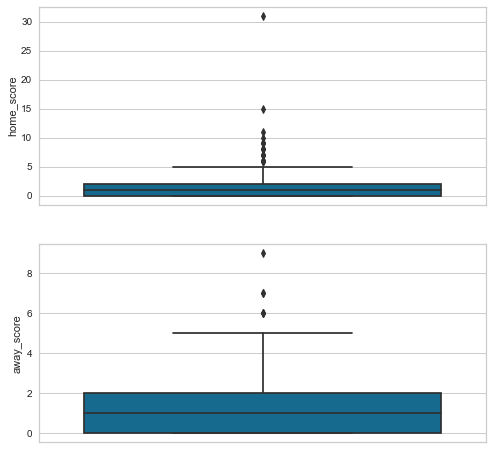

In [310]:
# boxplots of scores


fig, axes = plt.subplots(2, figsize=(8,8))

for i, col in enumerate(['home_score', 'away_score']):
    sns.boxplot(data=df, y=col, ax=axes[i])
    ax.set_title(i)
    ax.set_xlabel(col)
    

Any goal above five seems to be an outlier. This requires further examination

In [311]:
df[(df['home_score'] > 5) | (df['away_score'] > 5)].shape

(29, 8)

29 entries out of 871 are not that big of a loss. The outliers will be dropped

In [312]:
df = df[~((df['home_score'] > 5) | (df['away_score'] > 5))]

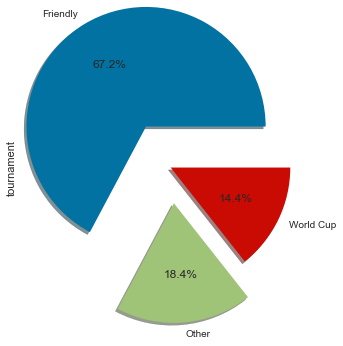

In [313]:
df['tournament'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=(0.4, 0.3, 0))
plt.show()

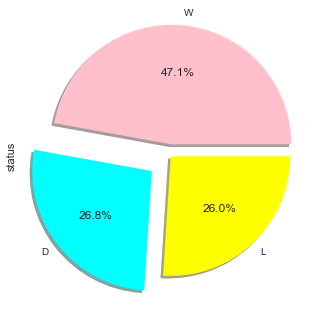

In [314]:
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                 shadow=True, colors=['pink', 'cyan', 'yellow'],
                                explode=(0.1, 0.2, 0))
plt.show()

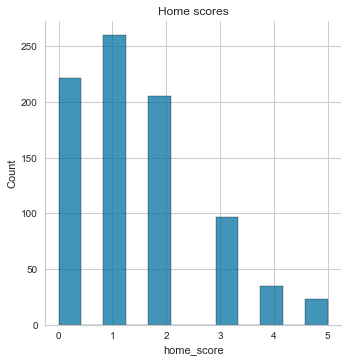

In [315]:
# home score number distribution

sns.displot(data=df, x='home_score', palette='pastel')
plt.title("Home scores")
plt.show()

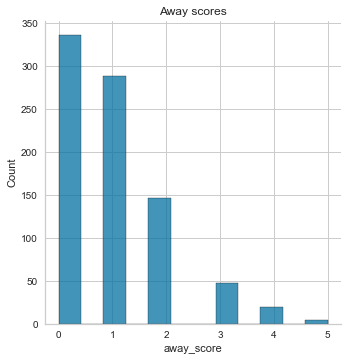

In [316]:
# away score distributions

sns.displot(data=df, x='away_score', palette='pastel')
plt.title("Away scores")
plt.show()

**Insights**

From the two above plots:

* Majority of away teams left the game without scoring a single goal
* Most home teams scored at least one goal in their matches

In [317]:
# description of the two numerical columns

df[['home_score', 'away_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,842.0,1.444181,1.258444,0.0,0.0,1.0,2.0,5.0
away_score,842.0,0.978622,1.046832,0.0,0.0,1.0,2.0,5.0


In [318]:
# kurtosis of the two distributions

print("Home score kurtosis: ",df['home_score'].kurt())

print("Away score kurtosis: ", df['away_score'].kurt())

Home score kurtosis:  0.2047522611472985
Away score kurtosis:  1.1215373214921227


In [319]:
# The two are very light tailed when compared to normal distributions

## Data Preparation for Modelling

In [320]:
# label encoding categorical variables

encoder = LabelEncoder()

In [321]:
# status column

encoder.fit(df['status'])
s_class = encoder.classes_
df['status'] = encoder.transform(df['status'])


In [322]:
# tournament column
encoder.fit(df['tournament'])
df['tournament'] = encoder.transform(df['tournament'])
t_class = encoder.classes_

## Models

### Polynomial Regression

#### Model 1

* Predict how many goals the home team scores

In [323]:
# feature selection

X = df[['home_rank', 'away_rank', 'tournament']]
y = df['home_score']

In [324]:
# baseline linear model

base = LinearRegression()
base.fit(X, y)

LinearRegression()

In [325]:
# Base model performance

mean_squared_error(y, base.predict(X))

1.348919814409707

In [326]:
# Transforming the X variable into a polynomial one

X_poly = PolynomialFeatures(degree=2).fit_transform(X)


# train and test splits

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.2, random_state=23)

In [327]:
# Fitting the Polynomial model

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

In [328]:
# Assessing it's performance

mean_squared_error(y_test, poly_model.predict(X_test))

1.5667025842571198

In [329]:
# Altering the Polynomial degree

X_poly = PolynomialFeatures(degree=4).fit_transform(X)


# train and test splits

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.2, random_state=23)


# Fitting and assessing

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)


mean_squared_error(y_test, poly_model.predict(X_test))

2.1220842372629964

With increasing degree, the model performs worse. In fact the polynomial model is worse than a baseline linear model on all accounts

#### Model 2

* Predicting the away score

In [330]:
# feature selection

X = df[['home_rank', 'away_rank', 'tournament']]
y = df['away_score']

In [331]:
# baseline linear model

base = LinearRegression()
base.fit(X, y)

# Base model performance

mean_squared_error(y, base.predict(X))

1.0040421056662376

In [332]:
# Transforming the X variable into a polynomial one

X_poly = PolynomialFeatures(degree=2).fit_transform(X)


# train and test splits

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.2, random_state=23)

In [333]:
# Fitting the Polynomial model

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Assessing it's performance

mean_squared_error(y_test, poly_model.predict(X_test))

0.9012475092570612

In [334]:
# Altering the Polynomial degree

X_poly = PolynomialFeatures(degree=3).fit_transform(X)


# train and test splits

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.2, random_state=23)


# Fitting and assessing

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)


mean_squared_error(y_test, poly_model.predict(X_test))

0.8859786668044258

* Surprisingly, when it comes to predicting the away score, the polynomial model does better than it's baselines counterpart. The degree can only be increased to 3 before the MSE gets worse

### Logistic Regression

* Match status prediction from home team perspective

In [350]:
# Feature selection

X = df[['home_rank', 'away_rank',  'tournament']]
y = df['status']

In [351]:
# Train test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)

In [352]:
# Model initialization and fitting

log_model = LogisticRegression(n_jobs=-1)

log_model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

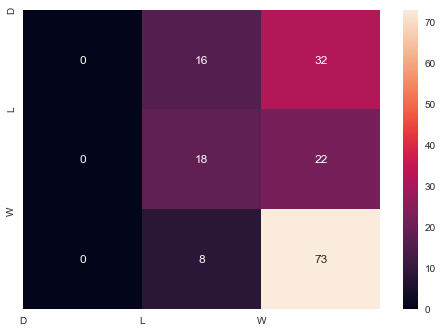

In [353]:
# Assessing the model performance

cm = confusion_matrix(y_test, log_model.predict(X_test))

sns.heatmap(cm, annot=True)
plt.xticks(ticks=[0,1,2], labels=s_class)
plt.yticks(ticks=[0,1,2], labels=s_class)
plt.show()

In [354]:
# classification report
print(classification_report(y_test, log_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.43      0.45      0.44        40
           2       0.57      0.90      0.70        81

    accuracy                           0.54       169
   macro avg       0.33      0.45      0.38       169
weighted avg       0.38      0.54      0.44       169



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusions

From the above models, Logisitic regression performs better in term of predicting the outcome of the match. However, more data would be needed in order to better train the model to achieve better accuracies